In [1]:
import keras,os
import numpy as np
from keras.models import Model
from keras.layers import Dense
from keras import optimizers

from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
import PIL
from io import BytesIO
from IPython.display import display,Image
import tensorflow as tf

In [2]:
trdata = ImageDataGenerator()
traindata = trdata.flow_from_directory(directory="C:/Users/HP/DL_Project/Cat_and_Dog_Dataset/training_set",target_size=(224,224))
tsdata = ImageDataGenerator()
testdata =tsdata.flow_from_directory(directory="C:/Users/HP/DL_Project/Cat_and_Dog_Dataset/test_set",target_size=(224,224))

Found 151 images belonging to 2 classes.
Found 48 images belonging to 2 classes.


In [3]:
from keras.applications.vgg16 import VGG16
vggmodel = VGG16(weights='imagenet',include_top=True)

In [4]:
vggmodel.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [5]:
for layers in (vggmodel.layers)[:19]:
    print(layers)
    layers.trainable = False

In [6]:
X=vggmodel.layers[-2].output
predictions =Dense(2,activation="softmax")(X)
model_final = Model(inputs = vggmodel.input,outputs=predictions)

In [7]:
from tensorflow.keras.optimizers import Adam
learningRate = 0.001

In [8]:
model_final.compile(loss='binary_crossentropy',
             optimizer = Adam(learning_rate = learningRate),
             metrics = ['accuracy'])

In [9]:
model_final.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [10]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

In [11]:
checkpoint = ModelCheckpoint("vgg16_1.h5", monitor='val_accuracy', verbose=1, save_best_only=True,save_weights_only=False, mode='auto',period=1)
early=EarlyStopping(monitor='val_accuracy',min_delta=0,patience=40,verbose=1,mode='auto')

hist = model_final.fit_generator(generator=traindata,steps_per_epoch=2,epochs=20,validation_data=testdata,validation_steps=1,callbacks=[checkpoint,early])

C:\Users\HP\AppData\Local\Temp/ipykernel_12432/1236652412.py:4: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hist = model_final.fit_generator(generator=traindata,steps_per_epoch=2,epochs=20,validation_data=testdata,validation_steps=1,callbacks=[checkpoint,early])


Epoch 1/20
2/2 [==============================] - ETA: 0s - loss: 46.1006 - accuracy: 0.6562
Epoch 1: val_accuracy improved from -inf to 0.43750, saving model to vgg16_1.h5
2/2 [==============================] - 34s 24s/step - loss: 46.1006 - accuracy: 0.6562 - val_loss: 40.6796 - val_accuracy: 0.4375
Epoch 2/20
2/2 [==============================] - ETA: 0s - loss: 23.8962 - accuracy: 0.6250
Epoch 2: val_accuracy improved from 0.43750 to 0.90625, saving model to vgg16_1.h5
2/2 [==============================] - 33s 23s/step - loss: 23.8962 - accuracy: 0.6250 - val_loss: 2.6225 - val_accuracy: 0.9062
Epoch 3/20
2/2 [==============================] - ETA: 0s - loss: 7.8806 - accuracy: 0.8000
Epoch 3: val_accuracy did not improve from 0.90625
2/2 [==============================] - 27s 20s/step - loss: 7.8806 - accuracy: 0.8000 - val_loss: 2.3737 - val_accuracy: 0.9062
Epoch 4/20
2/2 [==============================] - ETA: 0s - loss: 4.6798 - accuracy: 0.8750
Epoch 4: val_accuracy did not

In [12]:
model_final.save_weights("vgg16_1.h5")

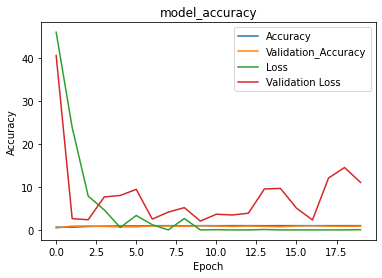

In [13]:
import matplotlib.pyplot as plt

plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title("model_accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy","Validation_Accuracy","Loss","Validation Loss"])
plt.show()



In [14]:
from keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
from keras.models import load_model

saved_model= model_final.save_weights("vgg16_1.h5")

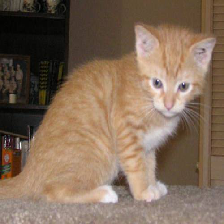

[[1. 0.]]
Cat


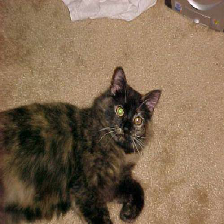

[[1. 0.]]
Cat


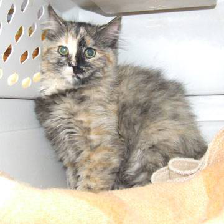

[[1. 0.]]
Cat


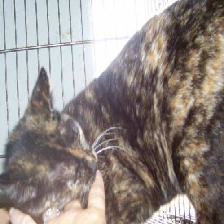

[[1. 0.]]
Cat


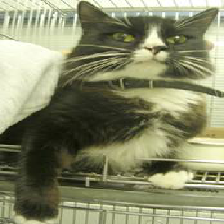

[[1. 0.]]
Cat


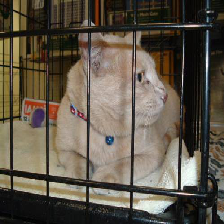

Dog
[[2.6079056e-19 1.0000000e+00]]


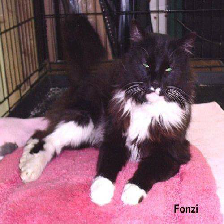

[[1. 0.]]
Cat


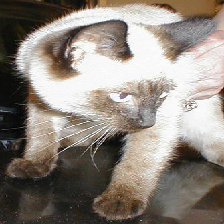

[[1. 0.]]
Cat


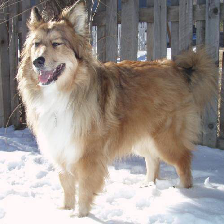

[[1. 0.]]
Cat


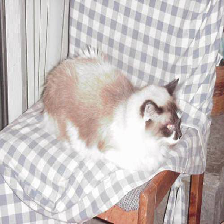

[[1. 0.]]
Cat


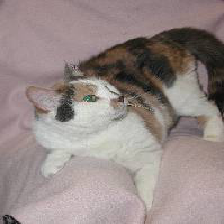

[[1. 0.]]
Cat


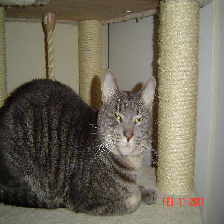

[[1. 0.]]
Cat


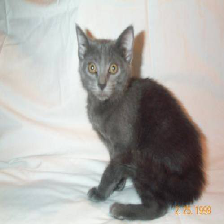

[[1. 0.]]
Cat


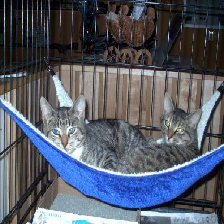

[[1. 0.]]
Cat


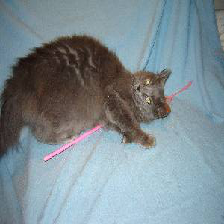

[[1. 0.]]
Cat


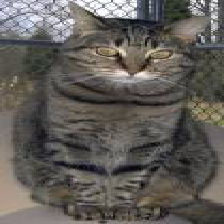

[[1. 0.]]
Cat


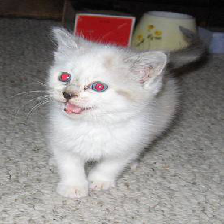

[[1. 0.]]
Cat


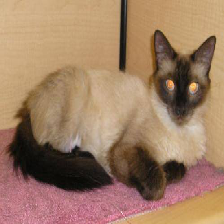

[[1. 0.]]
Cat


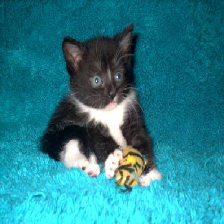

[[1. 0.]]
Cat


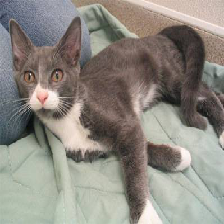

[[1. 0.]]
Cat


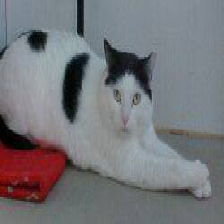

[[1. 0.]]
Cat


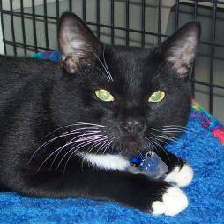

[[1. 0.]]
Cat


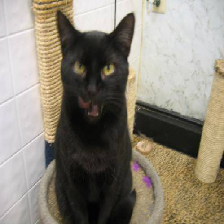

[[1. 0.]]
Cat


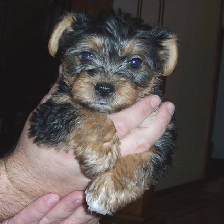

Dog
[[0. 1.]]


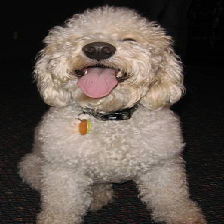

Dog
[[0. 1.]]


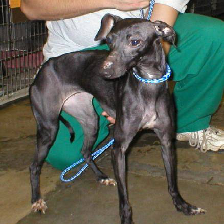

Dog
[[0. 1.]]


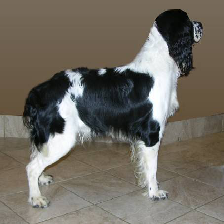

[[1. 0.]]
Cat


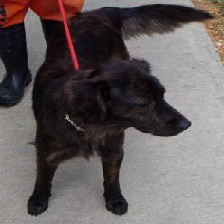

Dog
[[0. 1.]]


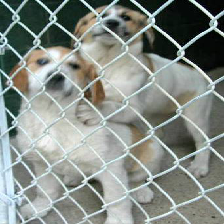

Dog
[[3.5589907e-13 1.0000000e+00]]


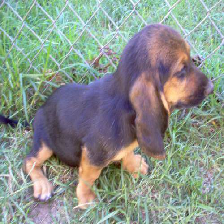

Dog
[[0. 1.]]


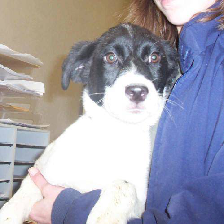

Dog
[[0. 1.]]


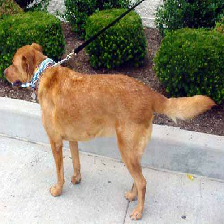

Dog
[[0. 1.]]


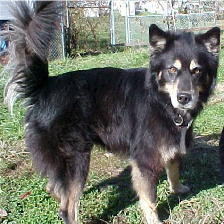

Dog
[[0. 1.]]


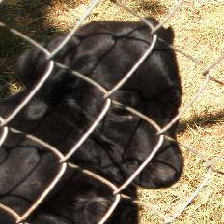

[[1. 0.]]
Cat


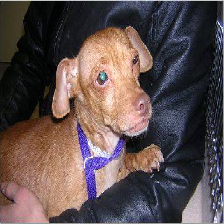

Dog
[[0. 1.]]


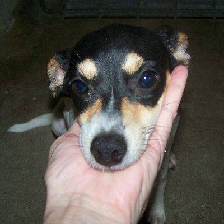

Dog
[[0. 1.]]


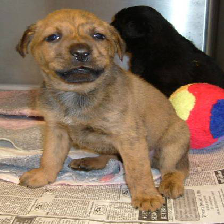

Dog
[[0. 1.]]


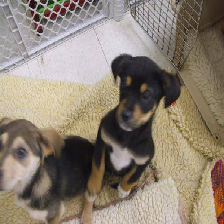

Dog
[[0. 1.]]


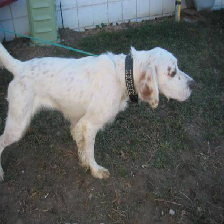

Dog
[[0. 1.]]


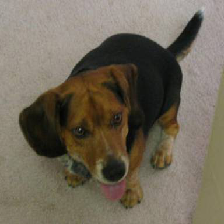

Dog
[[0. 1.]]


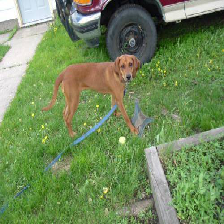

Dog
[[0. 1.]]


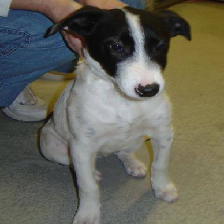

Dog
[[0. 1.]]


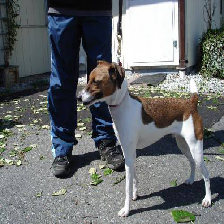

Dog
[[0. 1.]]


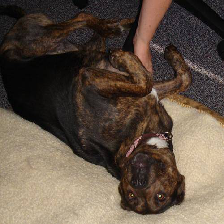

[[1. 0.]]
Cat


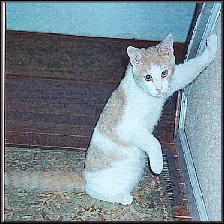

[[1. 0.]]
Cat


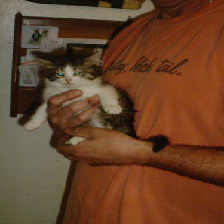

[[1. 0.]]
Cat


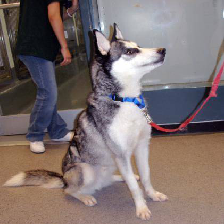

Dog
[[0. 1.]]


In [20]:
from io import BytesIO
import PIL
from IPython.display import display,Image

def display_img_array(ima):
    im = PIL.Image.fromarray(ima)
    bio=BytesIO()
    im.save(bio,format='png')
    display(Image(bio.getvalue(),format='png'))
    
for num in range(1,48,1):
    path="C:/Users/HP/DL_Project/Cat_and_Dog_Dataset/testing/"+str(num)+".jpg"
    img = image.load_img(path,target_size=(224,224))
    img = np.asarray(img)
    display_img_array(img)
    img = np.expand_dims(img,axis=0)
    output = model_final.predict(img)
    if output[0][0]>output[0][1]:
        print(output)
        print("Cat")
        
    else:
        print("Dog")
        print(output)